In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
all_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
X = all_data[['MedInc', 'Latitude', 'Longitude']]
X

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [6]:
X_test, X_train = train_test_split(X, test_size=0.9, random_state=42)



In [7]:
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[0.08146784, 0.37407014, 0.53187251],
       [0.14009462, 0.27630181, 0.48705179],
       [0.2055282 , 0.55897981, 0.19023904],
       ...,
       [0.30609923, 0.1392136 , 0.59462151],
       [0.18793534, 0.56004251, 0.20916335],
       [0.17184591, 0.54835282, 0.21812749]], shape=(18576, 3))

In [8]:
# Training the model
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)


KMeans(n_clusters=6, random_state=42)

In [9]:
predictions = model.predict(X_train)
predictions

array([2, 2, 4, ..., 3, 4, 4], shape=(18576,), dtype=int32)

In [10]:
t_predictions = model.predict(X_test)
t_predictions

array([5, 3, 4, ..., 0, 1, 4], shape=(2064,), dtype=int32)

In [11]:
X_train[0]

array([0.08146784, 0.37407014, 0.53187251])

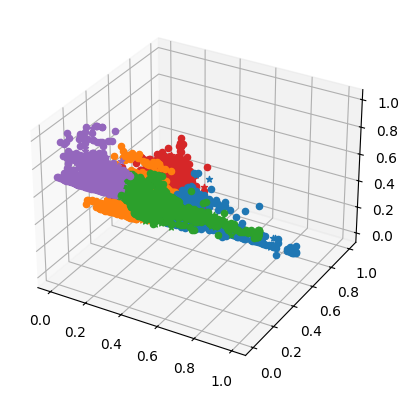

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#Plotting X_train
for i in range(len(X_train)):
    if(predictions[i] == 1):
        x, y, z = X_train[i]
        ax.scatter(x, y, z, color='C0')
    elif(predictions[i] == 2):
        x, y, z = X_train[i]
        ax.scatter(x, y, z, color='C1')
    elif(predictions[i] == 3):
        x, y, z = X_train[i]
        ax.scatter(x, y, z, color='C2')
    elif(predictions[i] == 4):
        x, y, z = X_train[i]
        ax.scatter(x, y, z, color='C3')
    elif(predictions[i] == 5):
        x, y, z = X_train[i]
        ax.scatter(x, y, z, color='C4')
    elif(predictions[i] == 6):
        x, y, z = X_train[i]
        ax.scatter(x, y, z, color='C5')
#Plotting X_test
for i in range(len(X_test)):
    if(t_predictions[i] == 1):
        x, y, z = X_test[i]
        ax.scatter(x, y, z, color='C0', marker='*')
    elif(t_predictions[i] == 2):
        x, y, z = X_test[i]
        ax.scatter(x, y, z, color='C1', marker='*')
    elif(t_predictions[i] == 3):
        x, y, z = X_test[i]
        ax.scatter(x, y, z, color='C2', marker='*')
    elif(t_predictions[i] == 4):
        x, y, z = X_test[i]
        ax.scatter(x, y, z, color='C3', marker='*')
    elif(t_predictions[i] == 5):
        x, y, z = X_test[i]
        ax.scatter(x, y, z, color='C4', marker='*')
    elif(t_predictions[i] == 6):
        x, y, z = X_test[i]
        ax.scatter(x, y, z, color='C5', marker='*')



#This code takes about 2 1/2 minutes to run (not very pythonic), but the test data seems to fit with the train
    
    


In [13]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

d_model = DecisionTreeClassifier(random_state = 42)
d_model.fit(X_train, predictions)


DecisionTreeClassifier(random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score#, confusion_matrix, ConfusionMatrixDisplay

d_prediction = d_model.predict(X_test)
accuracy_score(t_predictions, d_prediction)

#TBH I'm a little unclear on how to interpret these results. I think it worked

0.9907945736434108

In [17]:
from pickle import dump

dump(d_model, open("decision-tree-classifier-pn.sav", "wb"))
dump(model, open("k-means-classifier-pn.sav", "wb"))